<a href="https://colab.research.google.com/github/LindsClar/Real_Estate_Rep/blob/main/Predicting_CA_Property_Through_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How I'll be approaching the data.

The data contains all the sales documented on Zillow from 2018 to 2024 for every state in the United States.

I'll be cleaning the data then narrowing the data to only California.

The plan is to load the data, organize the data, split the data and model the data.



In [1]:
#import packages normal backages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Loading the Data

In [2]:
#read CSV files
df = pd.read_csv('/content/USRealEstateTrends.csv')

In [3]:
#Analyze information
df.head()

,RegionID,SizeRank,RegionName,StateName,2018-02-HomeValue,2018-02-DaysPending,2018-02-CutRaw,2018-03-HomeValue,2018-03-DaysPending,2018-03-CutRaw,2018-04-HomeValue,2018-04-DaysPending,2018-04-CutRaw,2018-05-HomeValue,2018-05-DaysPending,2018-05-CutRaw,2018-06-HomeValue,2018-06-DaysPending,2018-06-CutRaw,2018-07-HomeValue,2018-07-DaysPending,2018-07-CutRaw,2018-08-HomeValue,2018-08-DaysPending,2018-08-CutRaw,2018-09-HomeValue,2018-09-DaysPending,2018-09-CutRaw,2018-10-HomeValue,2018-10-DaysPending,2018-10-CutRaw,2018-11-HomeValue,2018-11-DaysPending,2018-11-CutRaw,2018-12-HomeValue,2018-12-DaysPending,2018-12-CutRaw,2019-01-HomeValue,2019-01-DaysPending,2019-01-CutRaw,2019-02-HomeValue,2019-02-DaysPending,2019-02-CutRaw,2019-03-HomeValue,2019-03-DaysPending,2019-03-CutRaw,2019-04-HomeValue,2019-04-DaysPending,2019-04-CutRaw,2019-05-HomeValue,...,2023-01-DaysPending,2023-01-CutRaw,2023-02-HomeValue,2023-02-DaysPending,2023-02-CutRaw,2023-03-HomeValue,2023-03-DaysPending,2023-03-CutRaw,2023-04-HomeValue,2023-04-DaysPending,2023-04-CutRaw,2023-05-HomeValue,2023-05-DaysPending,2023-05-CutRaw,2023-06-HomeValue,2023-06-DaysPending,2023-06-CutRaw,2023-07-HomeValue,2023-07-DaysPending,2023-07-CutRaw,2023-08-HomeValue,2023-08-DaysPending,2023-08-CutRaw,2023-09-HomeValue,2023-09-DaysPending,2023-09-CutRaw,2023-10-HomeValue,2023-10-DaysPending,2023-10-CutRaw,2023-11-HomeValue,2023-11-DaysPending,2023-11-CutRaw,2023-12-HomeValue,2023-12-DaysPending,2023-12-CutRaw,2024-01-HomeValue,2024-01-DaysPending,2024-01-CutRaw,2024-02-HomeValue,2024-02-DaysPending,2024-02-CutRaw,2024-03-HomeValue,2024-03-DaysPending,2024-03-CutRaw,2024-04-HomeValue,2024-04-DaysPending,2024-04-CutRaw,2024-05-HomeValue,2024-05-DaysPending,2024-05-CutRaw
0,102001,0,United States,NaN,225746.614318,52.0,7600.0,227155.648994,48.0,8900.0,228438.629400,44.0,9100.0,229684.954925,43.0,9900.0,230589.339512,43.0,9900.0,231734.954818,46.0,9500.0,232833.567713,50.0,9000.0,233945.332071,55.0,9000.0,234709.813080,58.0,9000.0,235478.159411,66.0,7400.0,236299.288621,73.0,6300.0,237289.771461,76.0,7012.0,238439.320119,71.0,7300.0,239654.026006,62.0,8500.0,240737.421483,56.0,9100.0,241545.124009,...,55.0,10000.0,343385.051354,50.0,10000.0,343322.729205,42.0,10000.0,344300.091136,36.0,10000.0,345947.786447,32.0,10100.0,347911.523074,31.0,10100.0,349682.959470,33.0,10001.0,351326.776628,35.0,10000.0,352568.687984,36.0,10000.0,353498.016711,38.0,10000.0,354156.373278,42.0,10000.0,354593.279543,51.0,10000.0,355028.057590,55.0,10000.0,355824.822434,50.0,10000.0,357374.362080,42.0,10000.0,359240.114070,38.0,10000.0,360681.294250,37.0,10000.0
1,394913,1,"New York, NY",NY,468313.430126,68.0,16000.0,470102.249154,63.0,19751.5,471975.139282,65.0,20000.0,474548.478326,62.0,20000.0,476743.135958,65.0,20000.0,479141.075157,71.0,16225.0,481145.053608,77.0,15000.0,482976.771233,83.0,20000.0,483993.885751,85.0,19100.0,484870.602860,92.0,16000.0,485482.367135,101.0,15000.0,486517.359921,108.0,16000.0,488077.487215,98.0,15500.0,490069.312030,93.0,17000.0,492238.928284,85.0,20000.0,493679.094982,...,81.0,21000.0,606549.795154,75.0,20001.0,606865.691355,64.0,25000.0,608876.826055,56.0,25000.0,612913.607463,53.0,25100.0,617090.131905,54.0,26000.0,620698.182208,54.0,25000.0,624002.861164,56.0,25000.0,626734.058777,58.0,25100.0,629084.958977,56.0,25010.0,631401.034576,58.0,25000.0,634169.169027,69.0,21000.0,637058.614303,76.0,25000.0,641103.485128,68.0,25000.0,646508.747102,55.0,25000.0,652619.099940,51.0,26000.0,657279.223513,47.0,30000.0
2,753899,2,"Los Angeles, CA",CA,629019.165765,33.0,20000.0,636850.139417,31.0,20000.0,642812.891135,31.0,20000.0,647593.399815,31.0,20000.0,651181.044962,33.0,20000.0,654935.397599,36.0,20000.0,660584.065185,39.0,19100.0,668122.619698,44.0,20000.0,676129.530836,45.0,20000.0,681798.689695,48.0,19900.0,684820.277655,59.0,15160.0,682313.932465,62.0,19200.0,675778.924247,56.0,19000.0,667819.448301,50.0,19100.0,662745.932012,45.0,20000.0,660162.040400,...,56.0,26000.0,891127.6159

# Evaluating and Organizing the Data

In [4]:
#clean/fill missing data
#rename column name
df.rename(index=str, columns={'RegionName' : 'Location', 'StateName':'State'}, inplace=True)

#dropping the not needed
df.dropna(inplace=True)

#identifying missing values
df.isna().sum()

,0
RegionID,0
SizeRank,0
Location,0
State,0
2018-02-HomeValue,0
...,...
2024-04-DaysPending,0
2024-04-CutRaw,0
2024-05-HomeValue,0
2024-05-DaysPending,0


In [5]:
#Melting Data - melted data allows you to split the dataset by time
df_melt=pd.melt(df, id_vars=['RegionID','SizeRank','Location','State',], var_name='Year_Month_Parameters', value_name='Values')

df_melt[['Year', 'Month_Parameters']] = df_melt['Year_Month_Parameters'].str.split('-', expand=True, n=1)
df_melt.drop('Year_Month_Parameters', axis=1, inplace=True)

#Organize so melted DF shows a column of month
df_melt[['Month', 'Parameters']] = df_melt['Month_Parameters'].str.split('-', expand=True, n=1)
df_melt.drop(columns = ['Month_Parameters'], inplace=True)

df_melt.head()


,RegionID,SizeRank,Location,State,Values,Year,Month,Parameters
0,394913,1,"New York, NY",NY,468313.430126,2018,02,HomeValue
1,753899,2,"Los Angeles, CA",CA,629019.165765,2018,02,HomeValue
2,394463,3,"Chicago, IL",IL,229741.266973,2018,02,HomeValue
3,394514,4,"Dallas, TX",TX,241533.231800,2018,02,HomeValue
4,394692,5,"Houston, TX",TX,208651.872272,2018,02,HomeValue


In [6]:
# Pivot the DataFrame to have measures as columns
df_reorganized = df_melt.pivot_table(index=['RegionID','SizeRank','Location','State','Year','Month'], columns='Parameters', values='Values').reset_index()
df_reorganized.head(5)

Parameters,RegionID,SizeRank,Location,State,Year,Month,CutRaw,DaysPending,HomeValue
0,394308,64,"Albany, NY",NY,2018,02,5100.0,64.0,218876.519605
1,394308,64,"Albany, NY",NY,2018,03,7000.0,62.0,219792.863791
2,394308,64,"Albany, NY",NY,2018,04,8000.0,54.0,220505.058669
3,394308,64,"Albany, NY",NY,2018,05,9000.0,45.0,221526.705984
4,394308,64,"Albany, NY",NY,2018,06,9100.0,47.0,222479.931387


In [7]:
#focus to CA  - filter the DF
CA = df_reorganized.loc[df_reorganized['State']=='CA']

In [8]:
#Correcting time
CA['Date'] = pd.to_datetime(CA['Year'].astype(str) + '-' + CA['Month'].astype(str))
print(CA['Date'].head())

304   2018-02-01
305   2018-03-01
306   2018-04-01
307   2018-05-01
308   2018-06-01
Name: Date, dtype: datetime64[ns]


<ipython-input-8-870d248f46d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA['Date'] = pd.to_datetime(CA['Year'].astype(str) + '-' + CA['Month'].astype(str))


In [9]:
CA.head()

Parameters,RegionID,SizeRank,Location,State,Year,Month,CutRaw,DaysPending,HomeValue,Date
304,394357,63,"Bakersfield, CA",CA,2018,02,7000.0,51.0,212531.666950,2018-02-01
305,394357,63,"Bakersfield, CA",CA,2018,03,7100.0,48.0,213905.260766,2018-03-01
306,394357,63,"Bakersfield, CA",CA,2018,04,6000.0,46.0,214996.109254,2018-04-01
307,394357,63,"Bakersfield, CA",CA,2018,05,7600.0,47.0,216057.814209,2018-05-01
308,394357,63,"Bakersfield, CA",CA,2018,06,8000.0,48.0,217117.256125,2018-06-01


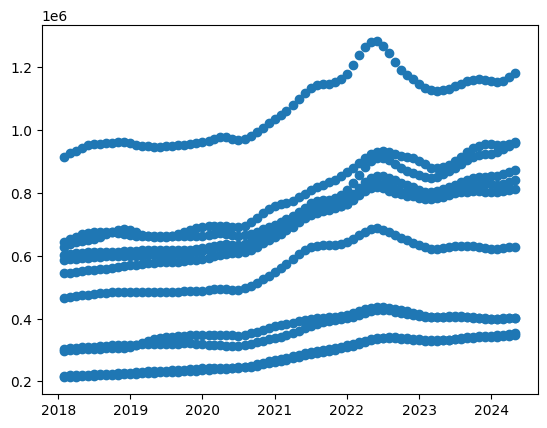

In [10]:
import matplotlib.pyplot as plt

plt.scatter(CA['Date'], CA['HomeValue'])

# Modeling
 Now we'll be testing and implimenting different models to inspect home value increate.



# 1. Linear Regression

In [11]:
#Locating the # of unique values
CA["Location"].nunique()
CA["Location"].unique()

array(['Bakersfield, CA', 'Chico, CA', 'Oxnard, CA', 'Salinas, CA',
       'San Diego, CA', 'San Francisco, CA', 'Santa Rosa, CA',
       'Truckee, CA', 'Visalia, CA', 'Los Angeles, CA', 'Sonora, CA'],
      dtype=object)

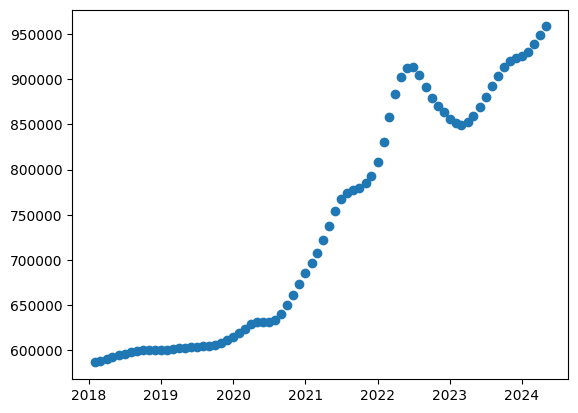

In [12]:
#Focusing on one city homevalues that were consistly recoreded for the State of CA
CA_SD = CA[CA['Location']=='San Diego, CA']

plt.scatter(CA_SD['Date'], CA_SD['HomeValue'])

Data Preparation for Linear Regression
  - best fit curve or line representing the relationship between these two variables. If the relation between dependent variable and independent variable is a straight line or establishing a linear relationship

In [13]:
CA_SD.info()

CA_SD['Date'] = CA_SD['Date'].map(pd.Timestamp.toordinal)

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 6916 to 6991
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   RegionID     76 non-null     int64         
 1   SizeRank     76 non-null     int64         
 2   Location     76 non-null     object        
 3   State        76 non-null     object        
 4   Year         76 non-null     object        
 5   Month        76 non-null     object        
 6   CutRaw       76 non-null     float64       
 7   DaysPending  76 non-null     float64       
 8   HomeValue    76 non-null     float64       
 9   Date         76 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 6.5+ KB


<ipython-input-13-72ef459dbd8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_SD['Date'] = CA_SD['Date'].map(pd.Timestamp.toordinal)


# Splitting the Data

In [14]:
#defining X and y

X = CA_SD[['Date']]
y = CA_SD['HomeValue']

In [15]:
#import library
from sklearn.model_selection import train_test_split

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=False)


In [16]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [17]:
clf.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = clf.predict(X_test)

In [19]:
y_test.head()

,HomeValue
6969,913153.036869
6970,904947.747440
6971,891490.618975
6972,879394.082138
6973,870207.266855


In [20]:
clf.score(X_test, y_test)

0.02507934596610384

This demonstates a really low predictive accuracy using linear Regression, despite the the low accuracy I will still be plotting the linear regression model.

In [21]:
print(f'This is the R2 Score : {clf.score(X_test, y_test)}')

This is the R2 Score : 0.02507934596610384


In [22]:
#import to mean squared error
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'This is the root of the Mean Squared Error : {rmse}')

This is the root of the Mean Squared Error : 32419.459238149804


In [23]:
#r2
r2 = r2_score(y_test, y_pred)
print(f'This is the R2 Score : {r2}')

This is the R2 Score : 0.02507934596610384


In [24]:
#testing the length before plotting the data
print(len(X_test), len(y_test), len(y_pred))

23 23 23


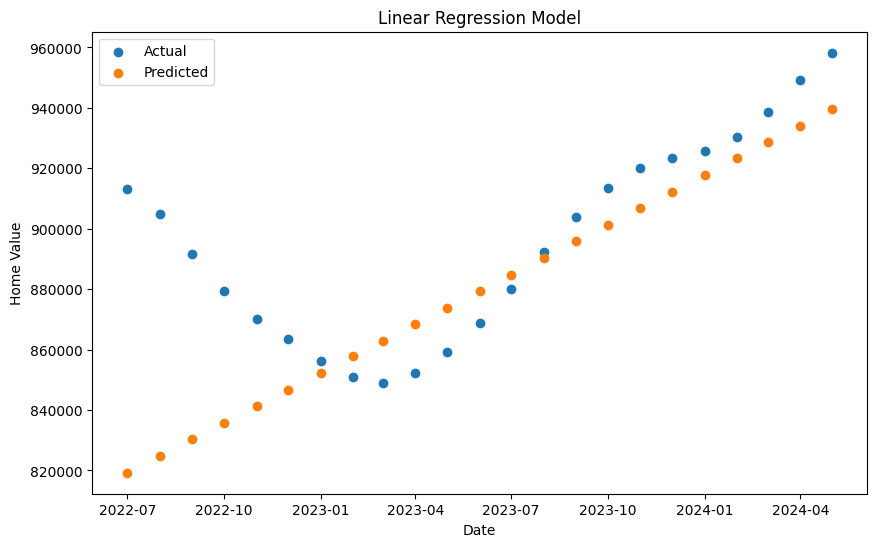

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test.map(pd.Timestamp.fromordinal), y_test)
plt.scatter(X_test.map(pd.Timestamp.fromordinal), y_pred)
plt.xlabel('Date')
plt.ylabel('Home Value')
plt.title('Linear Regression Model')
plt.legend(['Actual', 'Predicted'])
plt.show()

# 2. ARIMA

Autoregressive Integrated Moving Average


  - This model uses historical data to forecast for future values and it doesn't take into account external features, such as natural disasters.


An autocorrelation plot (ACF plot) shows how values in a time series relate to past values, or “lags.” The x-axis represents these lags (lag 1, lag 2, etc.), while the y-axis shows the correlation strength, ranging from -1 to 1. Points near 1 or -1 indicate a strong relationship with past values, while values near 0 suggest no relationship. Confidence bands (horizontal dashed lines) mark the range where random noise is expected; points outside these bands indicate meaningful correlations for those lags.
Interpreting the ACF plot helps you detect patterns like trends or seasonality. If correlations decline gradually over lags, it suggests a trend, meaning past values have a lasting impact. Peaks at regular intervals indicate seasonality, as in monthly data showing yearly cycles. A single, significant spike at lag 1 that quickly fades suggests a simple dependence on recent past values. This insight helps decide on model parameters, like whether to include trend terms or seasonal adjustments, especially when working with ARIMA models in time series forecasting.

([<matplotlib.axis.XTick at 0x780178584550>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22'),
  Text(24, 0, '24'),
  Text(26, 0, '26'),
  Text(28, 0, '28'),
  Text(30, 0, '30'),
  Text(32, 0, '32'),
  Text(34, 0, '34'),
  Text(36, 0, '36'),
  Text(38, 0, '38'),
  Text(40, 0, '40'),
  Text(42, 0, '42'),
  Text(44, 0, '44'),
  Text(46, 0, '46'),
  Text(48, 0, '48'),
  Text(50, 0, '50'),
  Text(52, 0, '52')])

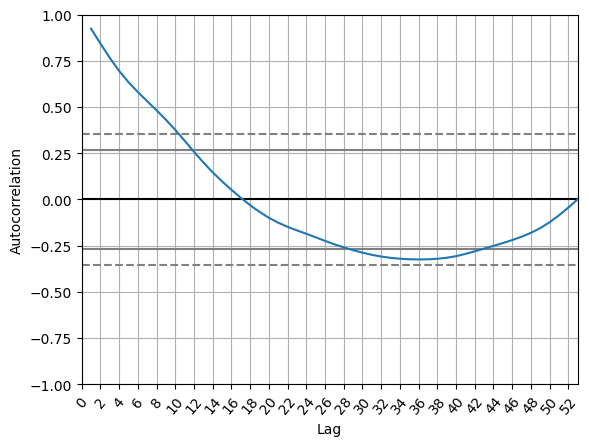

In [26]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(y_train)
# Adjust rotation
plt.xticks(range(0, len(y_train), 2), rotation=50)

In [27]:
#importing libraries for arima modeling
from statsmodels.tsa.arima.model import ARIMA

In [28]:
# Assuming y_train is your time series data
# Define a list of possible (p, d, q) combinations to test
parameter_combinations = [
    (0, 0, 0), (1, 0, 0), (2, 0, 0),
    (0, 1, 0), (1, 1, 0), (2, 1, 0),
    (0, 1, 1), (1, 1, 1), (2, 1, 1),
    (0, 2, 0), (1, 2, 0)
]

best_aic = np.inf  # Start with a very large AIC to track improvements
best_bic = np.inf  # Start with a very large BIC to track improvements
best_model = None  # To store the best model
best_order = None  # To store the best combination of (p, d, q)

# Loop over each combination and fit the ARIMA model
for p, d, q in parameter_combinations:
    print(f"Fitting ARIMA({p}, {d}, {q})...")

    # Create the ARIMA model with the current combination of parameters
    model = ARIMA(y_train, order=(p, d, q))

    # Fit the model to the data
    try:
        fitted_model = model.fit()

        # Get AIC and BIC for the current model
        aic = fitted_model.aic
        bic = fitted_model.bic

        # Check if the current model has better AIC/BIC than the previous best
        if aic < best_aic:
            best_aic = aic
            best_bic = bic
            best_model = fitted_model
            best_order = (p, d, q)

    except Exception as e:
        print(f"Error fitting ARIMA({p}, {d}, {q}): {e}")
        continue

# After the loop, print the best model's details
print(f"\nBest model is ARIMA{best_order} with AIC={best_aic} and BIC={best_bic}")
#print("\nSummary of the best model:")
#print(best_model.summary())

# Optionally, plot diagnostics for the best model
#best_model.plot_diagnostics(figsize=(12, 8))
#plt.show()

Fitting ARIMA(0, 0, 0)...
Fitting ARIMA(1, 0, 0)...
Fitting ARIMA(2, 0, 0)...
Fitting ARIMA(0, 1, 0)...
Fitting ARIMA(1, 1, 0)...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

Fitting ARIMA(2, 1, 0)...
Fitting ARIMA(0, 1, 1)...
Fitting ARIMA(1, 1, 1)...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

Fitting ARIMA(2, 1, 1)...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Fitting ARIMA(0, 2, 0)...
Fitting ARIMA(1, 2, 0)...

Best model is ARIMA(0, 2, 0) with AIC=956.3036933320516 and BIC=958.2355189647759


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              HomeValue   No. Observations:                   53
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -477.152
Date:                Fri, 15 Nov 2024   AIC                            956.304
Time:                        00:34:11   BIC                            958.236
Sample:                             0   HQIC                           957.042
                                 - 53                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.652e+06   1.07e+06      7.171      0.000    5.56e+06    9.74e+06
Ljung-Box (L1) (Q):                  23.40   Jarque-Bera (JB):                 9.36
Prob(Q):                              0.00   Pr

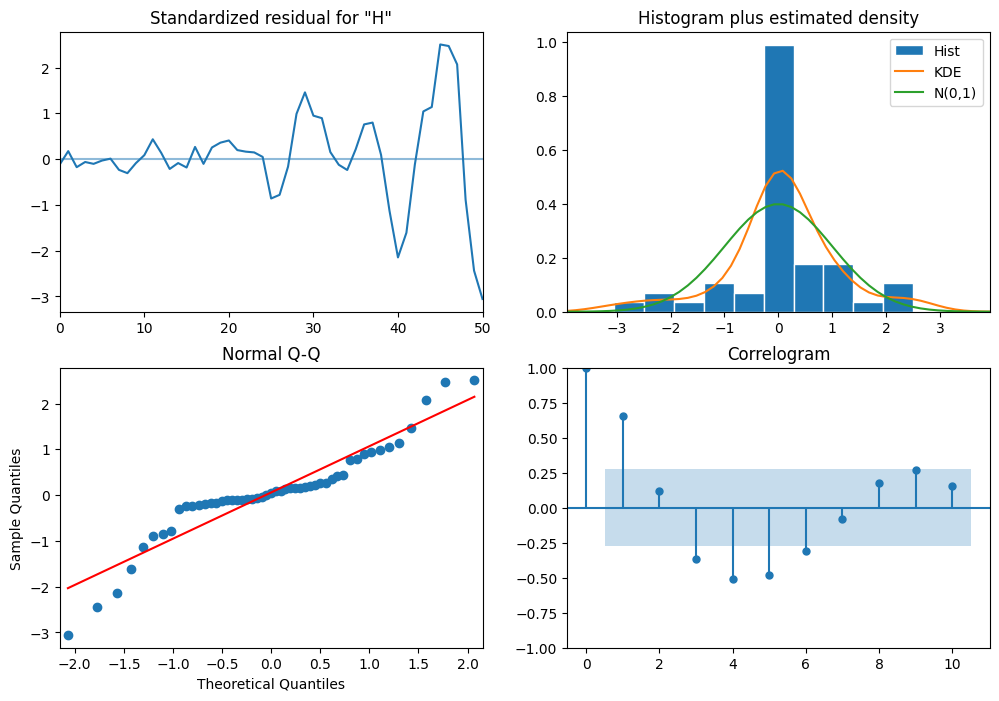

In [29]:
#The seasonal order is denoted by (P, D, Q, m)
order = (0, 2, 0)

#ARIMA model object
model = ARIMA(y_train, order=order)

#fit the model to the data
fitted_model = model.fit()

#print model's summary
print(fitted_model.summary())

#plot
fitted_model.plot_diagnostics(figsize=(12, 8))
plt.show()

Now we us the model to forecast future values of the time series. Forecasted values are the predicted values of the time series

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Predictions:
 2022-07-01    9.230767e+05
2022-08-01    9.333315e+05
2022-09-01    9.435863e+05
2022-10-01    9.538412e+05
2022-11-01    9.640960e+05
2022-12-01    9.743508e+05
2023-01-01    9.846056e+05
2023-02-01    9.948605e+05
2023-03-01    1.005115e+06
2023-04-01    1.015370e+06
2023-05-01    1.025625e+06
2023-06-01    1.035880e+06
2023-07-01    1.046135e+06
2023-08-01    1.056389e+06
2023-09-01    1.066644e+06
2023-10-01    1.076899e+06
2023-11-01    1.087154e+06
2023-12-01    1.097409e+06
2024-01-01    1.107664e+06
2024-02-01    1.117918e+06
2024-03-01    1.128173e+06
2024-04-01    1.138428e+06
2024-05-01    1.148683e+06
Name: predicted_mean, dtype: float64
Actual values (y_test):
 2022-07-01    913153.036869
2022-08-01    904947.747440
2022-09-01    891490.618975
2022-10-01    879394.082138
2022-11-01    870207.266855
2022-12-01    863423.863265
2023-01-01    856145.497995
2023-02-01    850919.128367
2023-03-01    849092.604725
2023-04-01    852290.137006
2023-05-01    859129.84

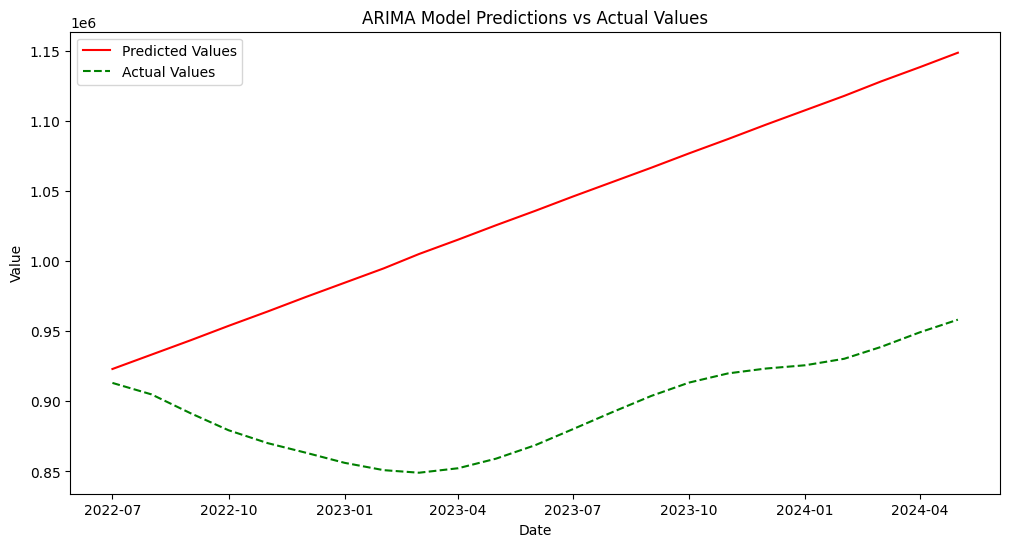

In [30]:
# Extract the dates from the first column of X_test
dates = X_test.iloc[:, 0].map(pd.Timestamp.fromordinal).values

# Generate predictions for the same range as X_test
start = len(y_train)
end = start + len(X_test) - 1
predictions = fitted_model.predict(start=start, end=end)

# Align predictions with dates from X_test
predictions.index = dates
y_test.index = dates

# Print predictions and y_test for verification
print("Predictions:\n", predictions)
print("Actual values (y_test):\n", y_test)

# Plot predictions vs actual values with dates on the x-axis
plt.figure(figsize=(12, 6))

# Plot the predicted values
plt.plot(dates, predictions, label='Predicted Values', color='red')

# Plot the actual values from y_test
plt.plot(dates, y_test, label='Actual Values', color='green', linestyle='--')

# Add labels, title, and legend for clarity
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Model Predictions vs Actual Values')
plt.legend()

# Show the plot
plt.show()

In [31]:
#forcasting the next 5 values
#forecast = fitted_model.get_forecast(steps=10)
#print Forcasted values
#print(f'There are the forecasted values: {forecast}')

#Extracting values
#forecast_values = forecast.predicted_mean
#print(f'There are the forecasted predicted mean values: {forecast_values}')

#confidence interval
#forecast_ci = forecast.conf_int()
#print(forecast_ci)

#plot
#plt.figure(figsize=(12, 6))
#plt.plot(y_train, label='Training Data')
#plt.plot(forecast_values, label='Forecasted Values')
#plt.plot(residuals)
#plt.fill_between(range(len(forecast_ci)), len(forecast_ci)+10, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='grey', alpha=0.3)
#plt.xlabel('Date')
#plt.ylabel('Home Value')
#plt.title('ARIMA Model Forecast')
#plt.legend()
#plt.show()

ARIMA shows to have effective modelling with this small data set that we are attempting to forcast data with a small period of historical data.

In the graph with historical predictions, the graph displays that the values will not just increase. For the most part the home values holds it's stability in cost but over time it doesn't rapidly increase as the model shows above.

The seems to be more external values that may be affecting the homevalue that we don't see in this model.

# 3. Random Forest

 I lowered the ammount of  n_estimators due to it being a univariant dataset. It being less complex means that it needs less decision tree's
  - Reference : https://www.ine.pt/revstat/pdf/Randomforestsfortimeseries.pdf

  - https://stackoverflow.com/questions/67116078/random-forest-train-test-split-accuracy

  

In [33]:
#import random Forest
from sklearn.ensemble import RandomForestRegressor

#setting use of Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)

#train the model
rf.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
#predict
y_pred_rf = rf.predict(X_test)

The variables weren't continuous so a confusion matrix isn't facilitate continuous predictions in Random Forest Regressor and so to get further understanding we will calculate MAE, MSE, RMSE and R2

In [37]:
#confusion matrix
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred_rf)
#print(cm)

In [39]:
#importing proper libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Absolute Error: 29549.789299772317
Mean Squared Error: 1187077518.8637736
Root Mean Squared Error: 34453.99133429643
R² Score: -0.10112549575747742


I wouldnt say that modeling through Random Forest is a good idea because the multi predictions that ARIMA modelling provides multiple future predictions compared to the one with Random Forest modeling.

It would be best to use random Forest modelling when there is more than one variable for imput. With the data being univariant this provides limits to the modeling.

Also, it would be better to efficiently on larger databases.

with the score = -.10 I'd say that it's pretty bad because it is less accurate.

# 4. XGBoost




This is gradient-boosted decision tree that is scaleable. It's an ensemble learning algorithim for classification and regression.

This includes bagging, boosting and gradient boosting ensemble technique.
  - Ensemble learning uses two or more learners.
  - Bagging uses a technique called bootstrap resampling to derive multiple new datasets from one initial training dataset in order to train multiple base learners.
  - Boosting combines multiple weaker classifers to create a stonger classifer.



In [49]:
#importing libraries for modeling XGBoost
import xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from xgboost import plot_tree

In [50]:
xgboost.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [51]:
#setting the matrix
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

#parameters
params = {'objective': 'reg:squarederror'}

#XGBoost model
model_xgb = xgb.train(params, dtrain)

#predictions from the test set
predictions_xgb = model_xgb.predict(dtest)

#calculate the regression
mae_xgb = mean_absolute_error(y_test, predictions_xgb)
mse_xgb = mean_squared_error(y_test, predictions_xgb)
rmse_xgb = np.sqrt(mse)
r2_xgb = r2_score(y_test, predictions_xgb)


print(f'Mean Absolute Error: {mse_xgb}')
print(f'Mean Squared Error: {mae_xgb}')
print(f'Root Mean Squared Error: {mae_xgb}')
print(f'R Squared : {r2_xgb}')

Mean Absolute Error: 1255683793.4159882
Mean Squared Error: 29965.081302239945
Root Mean Squared Error: 29965.081302239945
R Squared : -0.16476423617494285


The calculation of the regression indicaties that this models preformance isn't fitting well. I believe the model is too complex for the univariant data of the property sold in San Diego from 2018 to 2024. This model most likely needs more dimenstion from the data.

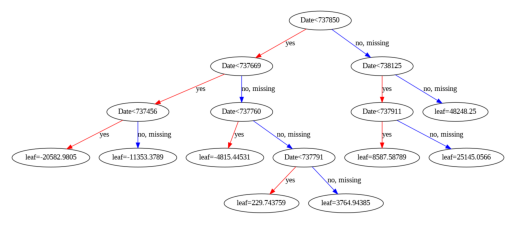

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

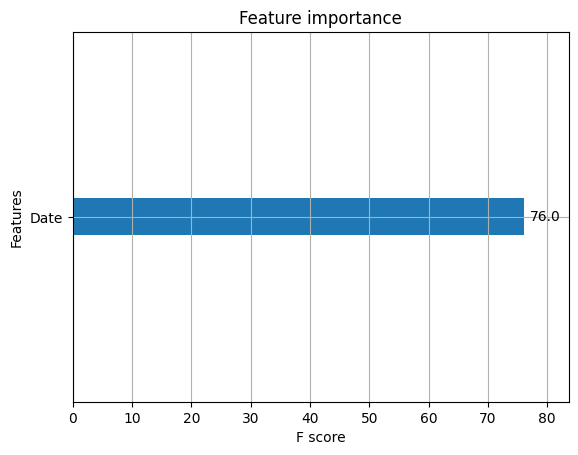

In [53]:
#plotting xgb

plot_tree(model_xgb)
plt.show()

#5. XGBRegressor



In [48]:
from xgboost import XGBRegressor

#was recieving an error because ytrain and y_test weren't continuous variables
y_train = y_train.astype(float)
y_test = y_test.astype(float)

#initicalizing
model_xgbregression = XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

#setting eval set to the test
eval_set = [(X_test, y_test)]

#training the model
model_xgbregression.fit(X_train, y_train, eval_set=eval_set, verbose=True)

#making predictions on the test set
y_pred_xgbregression = model_xgbregression.predict(X_test)



[0]	validation_0-rmse:178377.75559
[1]	validation_0-rmse:139851.24508
[2]	validation_0-rmse:109780.74754
[3]	validation_0-rmse:87451.63873
[4]	validation_0-rmse:72429.13360
[5]	validation_0-rmse:59031.52807
[6]	validation_0-rmse:49500.62388
[7]	validation_0-rmse:42978.96757
[8]	validation_0-rmse:38305.82574
[9]	validation_0-rmse:35435.63267
[10]	validation_0-rmse:33956.63399
[11]	validation_0-rmse:33136.87955
[12]	validation_0-rmse:32852.92300
[13]	validation_0-rmse:32870.83320
[14]	validation_0-rmse:33042.10746
[15]	validation_0-rmse:33335.24031
[16]	validation_0-rmse:33681.19538
[17]	validation_0-rmse:34043.08166
[18]	validation_0-rmse:34398.14641
[19]	validation_0-rmse:34733.19457
[20]	validation_0-rmse:35041.32472
[21]	validation_0-rmse:35319.65452
[22]	validation_0-rmse:35567.81182
[23]	validation_0-rmse:35786.93035
[24]	validation_0-rmse:35979.00116
[25]	validation_0-rmse:36146.38828
[26]	validation_0-rmse:36291.59326
[27]	validation_0-rmse:36417.13346
[28]	validation_0-rmse:3652